1\. Write a function that converts number representation (bin<->dec<->hex)

In [13]:
import string

alphabet = list(string.ascii_lowercase)
translator = {i+10:letter for i,letter in enumerate(alphabet)}
de_translator = {value: key for key,value in translator.items()}
codes = {16: 'x', 2: 'b'}

def to_dec(arg,original_base,code):
    nums = reversed(list(arg.split(code)[1]))
    dec = 0
    for i, n in enumerate(nums):
        n = de_translator.get(n,n)
        dec += int(n)*original_base**i
    return dec

def from_dec(arg,new_base,code):
    quo, res = arg//new_base, arg%new_base
    res = translator.get(res,res)
    nums = f'{res}'
    while quo:
        quo, res = quo//new_base, quo%new_base
        res = translator.get(res,res)
        nums = f'{res}'+nums
    num_rep =  '0'+code+nums
    return num_rep 

def convert(arg,original_base,new_base):
    '''Converts an integer number from one base to another.\n
    Processes hexadecimal, decimal and binary.\n
    Returns and expects hexadecimal and binary numbers as strings.'''
    if new_base == original_base:
        # No need to do anything
        return arg
    if new_base == 10:
        return to_dec(arg,original_base,codes[original_base])
    if original_base == 10:
        return from_dec(arg,new_base,codes[new_base])
    # If neither of the above was the case,
    # then it is a conversion from a non decimal base to another.
    # We'll pivot on the decimal base.
    return convert(convert(arg,original_base,10),10,new_base)

    
test_n = 1234
for base, int_base in zip(['hex','bin'],[16,2]):
    print(f"{base}({test_n}): {eval(base+F'({test_n})')} is equal to {convert(test_n,10,int_base)}")
    print(f"convert({eval(base+F'({test_n})')},{int_base},10): {convert(eval(base+F'(test_n)'),int_base,10)} is equal to {test_n}")
    print()


hex(1234): 0x4d2 is equal to 0x4d2
convert(0x4d2,16,10): 1234 is equal to 1234

bin(1234): 0b10011010010 is equal to 0b10011010010
convert(0b10011010010,2,10): 1234 is equal to 1234



2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [14]:
!pip install bitstring # Installing bitstring just for result validation
import bitstring
def bin_to_float(arg, n_exp_bits=8, bias=127):
    sign_b = arg[0] # It is assumed that the asign will always be specified by the first bit (from left to right)
    exp_bits = '0b'+arg[1:n_exp_bits+1] # Expressed in this way to easily convert it later on
    mantissa_bits = arg[n_exp_bits+1:] # The rest of bits belong to the mantissa
    number = 1
    _exp = convert(exp_bits,2,10)-bias # Here we use a previously defined function
    for i, b in enumerate(mantissa_bits):
        number+= int(b)*2**(-i-1)
    number*=(-1)**int(sign_b)*2**(_exp)
    return number

test_n = 1.53
bit = bitstring.BitArray(float = test_n, length = 32).bin
print(f'Test number: {test_n}. IEEE754 representation is given by bitstring is {bit}.\n The value of this bitsring is {bin_to_float(bit)}.')

Test number: 1.53. IEEE754 representation is given by bitstring is 00111111110000111101011100001010.
 The value of this bitsring is 1.5299999713897705.


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [15]:
a = 1.0
i = 0
r = a*2.0
while r/2.0 == a:# This condition breaks when r no longer accurately represents the integer as a float
    a*=2.0
    r = a*2.0
    i+=1
print(f'This computer has an overflow limit of {2.0**i}')
b = 1.0
j = 0
p = b/2.0
while p*2.0 == b:# This condition breaks when r no longer accurately represents the integer as a float
    b/=2.0
    p = b/2.0
    j+=1
print(f'This computer has an underflow limit of {2**-j}')

This computer has an overflow limit of 8.98846567431158e+307
This computer has an underflow limit of 5e-324


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [16]:
target = 1
i = 1
wrong = target + 10**(-i)
while wrong != target:
    i+=1
    wrong = target + 10**(-i)
print(f'Machine precision holds up to 10^-{i-1}')

Machine precision holds up to 10^-15


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [68]:
# Solution based on https://people.csail.mit.edu/bkph/articles/Quadratics.pdf
a,b,c = 0.001,1000,0.001
from math import sqrt, exp, log
det = lambda a,b,c: sqrt(b**2-4*a*c)
gen_quad = lambda a, b, c: ((-b+det(a,b,c))/(2*a), (-b-det(a,b,c))/(2*a))
re_gen_quad = lambda a, b, c: ((-b+det(a,b,c))*(-b-det(a,b,c))/(2*a*(-b-det(a,b,c))), (-b-det(a,b,c))*(-b+det(a,b,c))/(2*a*(-b+det(a,b,c))))
print(f'Directly applying the standard formula returns:\n{gen_quad(a,b,c)}\n')
print(f'Evaluation of the re-stated formula:\n{re_gen_quad(a,b,c)}\nThe difference between b squared and 4ac is too close to b squared.\n')

def acc_gen_quad(a,b,c):
    _det = det(a,b,c)
    if b>=0:
        x_1 = 2*c/(-b-_det)
        x_2 = (-b-_det)/(2*a)
    else:
        x_1 = (-b+_det)/(2*a)
        x_2 = 2*c/(-b+_det)
    return x_1, x_2

print(f'The roots in a more accurate algorithm are:\n{acc_gen_quad(a,b,c)}')

Directly applying the standard formula returns:
(-9.999894245993346e-07, -999999.999999)

Evaluation of the re-stated formula:
(-9.999894245993346e-07, -999999.9999990001)
The difference between b squared and 4ac is too close to b squared.

The roots in a more accurate algorithm are:
(-1.000000000001e-06, -999999.999999)


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

1.010000000000001
The analytical value of the derivative at x= 1 is 1.


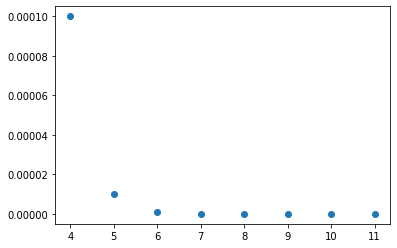

In [60]:
import matplotlib.pyplot as plt
import numpy as np

f = lambda x: x*(x-1)

def D_x(f,d):
    return lambda x: (f(x+d)-f(x))/d

df = D_x(f,1e-2)
print(df(1))
x=1
print(f'The analytical value of the derivative at x= {x} is {2*x-1}.')
sample = np.array([float(f'1e-{i}') for i in range(4,16)])
errors = abs(D_x(f, sample)(1)-1)
plt.scatter(np.arange(4,16)[:-4], errors[:-4])

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


The actual value is 1.5707963267948966
The calculated value is 1.5702085158895231
The error is 0.037421204477400175%
This suggests we can grow N to approximately 140269
The actual time spent on this calculation is 0.29237720699893543 seconds
The actual time spent on this calculation is 0.9851424199987378 seconds
The actual time spent on this calculation is 59.363076776000526 seconds, with N = 28785180. Error is now 57.07963267905036%


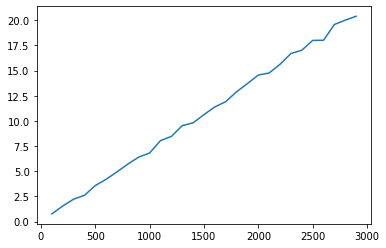

In [52]:
from math import pi
from timeit import timeit as ti
from scipy.linalg import lstsq

def Int_x(f,N):
    return lambda a,b: sum(f(x/N) for x in range(N*a,N*b))/N
print(f'The actual value is {pi/2}')
print(f'The calculated value is {Int_x(lambda x: sqrt(1-x**2),100)(-1,1)}')
diff = abs(pi/2-Int_x(lambda x: sqrt(1-x**2),100)(-1,1))
print(f'The error is {(diff/(pi/2))*100}%')

times = []
n = np.arange(100,3000,100)
for i in n:
    timeable = lambda: Int_x(lambda x: sqrt(1-x**2),i)(-1,1)
    times.append(ti(timeable, number = 1000))
times =np.array(times)
plt.plot(n,times)
A = np.vstack([n,np.ones(len(n))]).T
p,rss,rnk,s = lstsq(A,times)

# Since we are taking the time for 1000 evaluations, then a second is 1000 s. Solving p[0]*N+p[1]=1000 for N:
max_n_second = int((1000-p[1])//p[0])
print(f'Applying least squares suggests N can grow to approximately {max_n_second}')
second_long_calculation = lambda: Int_x(lambda x: sqrt(1-x**2),max_n_second)(-1,1)
actual_time = ti(second_long_calculation, number = 1)
print(f'The actual time spent on this calculation is {actual_time} seconds')
missed_factor = 1/actual_time
new_n = int(missed_factor*max_n_second)
print(f'The result implies, that we can go up to {new_n}. This number is way beyond the order of those evaluated for least squares.')
second_long_calculation = lambda: Int_x(lambda x: sqrt(1-x**2),new_n)(-1,1)
actual_time = ti(second_long_calculation, number = 1)
print(f'The actual time spent on this calculation is {actual_time} seconds')
# If we were to evaluate for at most 60 s
minute_long_calculation = lambda: Int_x(lambda x: sqrt(1-x**2),60*new_n)(-1,1)
actual_time = ti(minute_long_calculation, number = 1)
minute_error = abs(1-minute_long_calculation())
print(f'The actual time spent on this calculation is {actual_time} seconds, with N = {60*new_n}. Error is now {minute_error*100}%\n The error typically grows. The source of this growth can be mapped to the quotient 1/N in the method, whose computed value in operations is not reliable for N of this order.')
